In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np 
from scipy import stats 

In [2]:
pd.set_option('display.max_rows',None) 
pd.set_option('display.max_column',None) 

In [3]:
data=pd.read_csv("housing_training_data.csv")

In [4]:
data.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,3545,3.2375,5.0,6.028881,1.051118,4660.0,2.717201,38.10,-122.14,1.924
1,36760,4.5500,18.0,6.091451,1.030581,1623.0,3.330014,34.37,-118.52,1.991
2,29301,6.0743,16.0,6.394805,1.027350,1574.0,3.091451,34.11,-117.80,2.610
3,285,3.6875,15.0,5.164835,1.056911,616.0,2.737892,38.49,-122.59,1.917
4,30757,6.1273,11.0,6.256544,1.029503,7777.0,2.383468,34.19,-118.64,2.915


In [5]:
print(data.shape)

print((data.memory_usage().sum()/(1024*1024)).round(2), "MB")

(29709, 10)
2.27 MB


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29709 entries, 0 to 29708
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           29709 non-null  int64  
 1   MedInc       29709 non-null  float64
 2   HouseAge     29709 non-null  float64
 3   AveRooms     29709 non-null  float64
 4   AveBedrms    29709 non-null  float64
 5   Population   29709 non-null  float64
 6   AveOccup     29709 non-null  float64
 7   Latitude     29709 non-null  float64
 8   Longitude    29709 non-null  float64
 9   MedHouseVal  29709 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.3 MB


In [7]:
data.describe() 

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,29709.000000,29709.000000,29709.000000,29709.000000,29709.000000,29709.000000,29709.000000,29709.000000,29709.000000,29709.000000
mean,18603.548016,3.854474,26.084856,5.165188,1.062142,1664.366523,2.833073,35.574937,-119.559416,2.077761
std,10733.967318,1.808813,12.162222,1.194982,0.096120,1311.036683,2.999188,2.083048,1.975349,1.157184
min,1.000000,0.499900,2.000000,0.851064,0.500000,3.000000,0.950000,32.550000,-124.350000,0.149990
25%,9310.000000,2.600000,17.000000,4.359797,1.020216,950.000000,2.392789,33.930000,-121.800000,1.206000
50%,18611.000000,3.517900,25.000000,5.070281,1.054475,1383.000000,2.744425,34.190000,-118.450000,1.807000
75%,27928.000000,4.700000,35.000000,5.865672,1.088657,1858.000000,3.122137,37.700000,-118.020000,2.660000
max,37136.000000,15.000100,52.000000,23.891566,5.873181,35682.000000,502.990610,41.950000,-114.550000,5.000010


In [8]:
data.dtypes

id               int64
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In [9]:
data['Population'] = data['Population'].astype(int)
data.dtypes

id               int64
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population       int32
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In [10]:
data.isnull().sum()

id             0
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [11]:
numeric_columns=data.select_dtypes(include={'int','float'}).columns
categorical_columns=data.select_dtypes(include={'object'}).columns

In [12]:
numeric_columns

Index(['id', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [13]:
categorical_columns

Index([], dtype='object')

In [14]:
drop_column=["id"]

In [15]:
data.drop(drop_column,axis=1,inplace=True)
data.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,3.2375,5.0,6.028881,1.051118,4660,2.717201,38.10,-122.14,1.924
1,4.5500,18.0,6.091451,1.030581,1623,3.330014,34.37,-118.52,1.991
2,6.0743,16.0,6.394805,1.027350,1574,3.091451,34.11,-117.80,2.610
3,3.6875,15.0,5.164835,1.056911,616,2.737892,38.49,-122.59,1.917
4,6.1273,11.0,6.256544,1.029503,7777,2.383468,34.19,-118.64,2.915


In [16]:
columns_name = data.columns
columns_name

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

Skewness: 1.573529
Kurtosis: 4.478851
Skewness: 0.412138
Kurtosis: -0.495391
Skewness: 0.924182
Kurtosis: 7.154145
Skewness: 12.707439
Kurtosis: 398.725846
Skewness: 5.792844
Kurtosis: 86.389664
Skewness: 156.258773
Kurtosis: 26037.517783
Skewness: 0.431109
Kurtosis: -1.277929
Skewness: -0.305461
Kurtosis: -1.462461
Skewness: 0.974577
Kurtosis: 0.321886


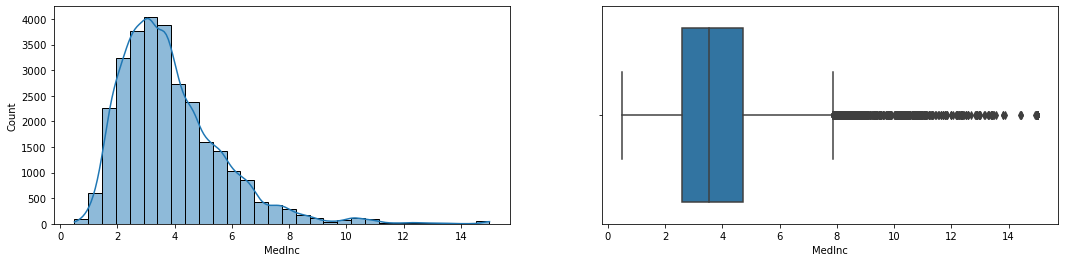

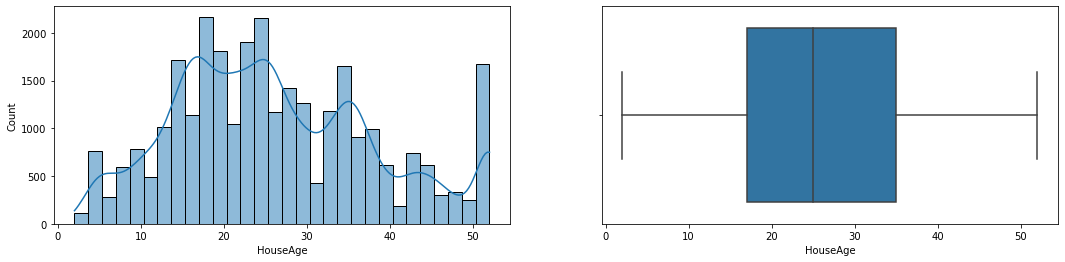

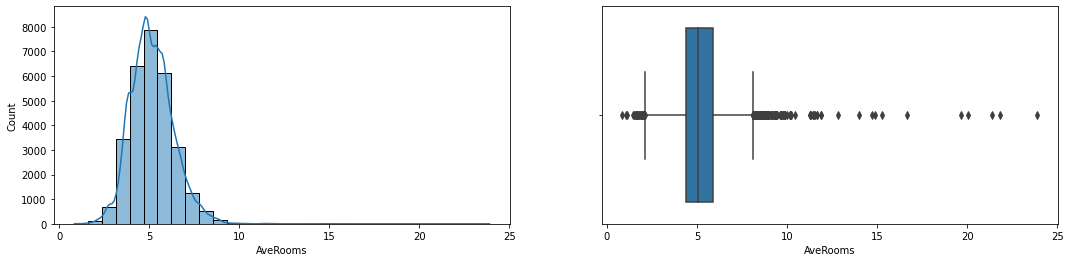

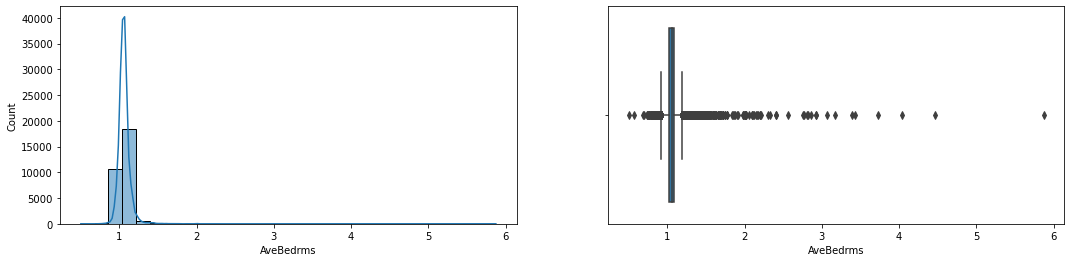

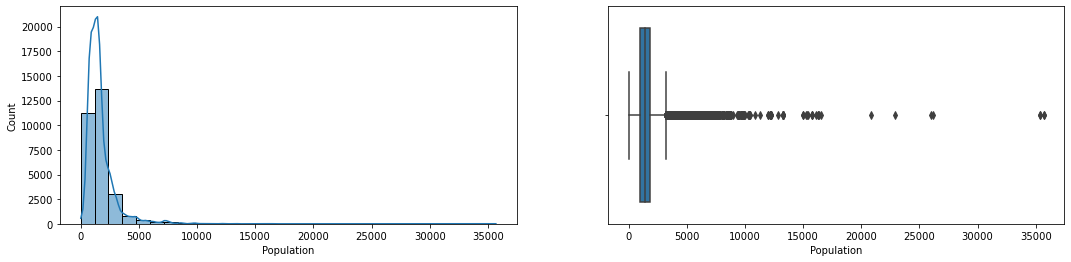

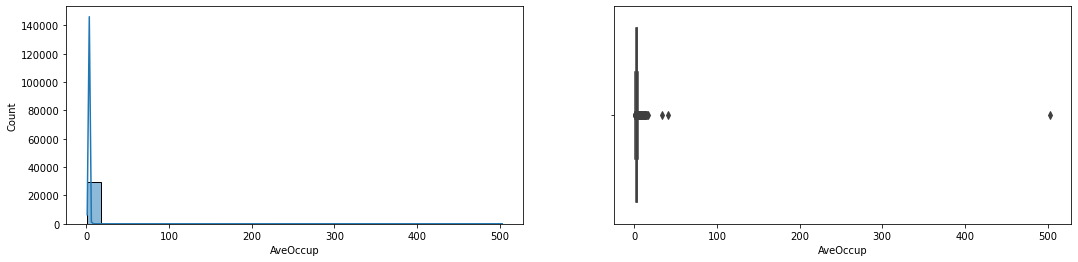

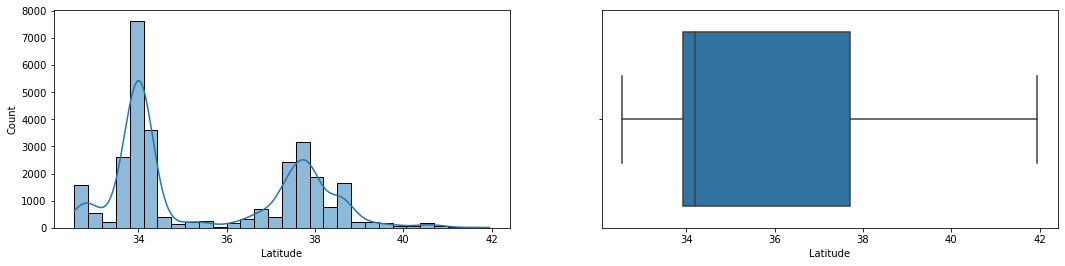

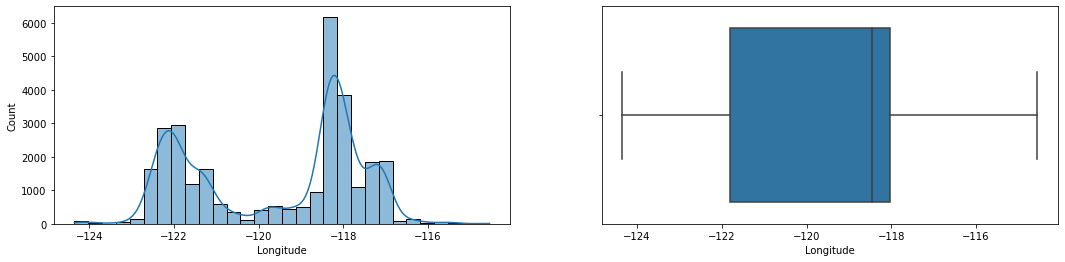

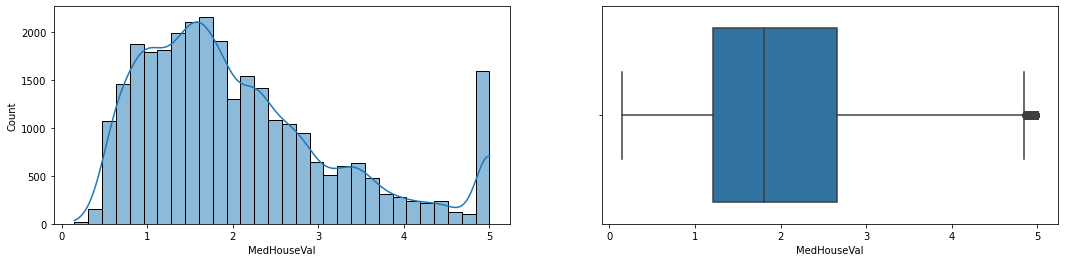

In [17]:
for col in columns_name:
    fig, axs = plt.subplots(1,2,figsize=(18,4))
    sns.histplot(data=data,x=col,bins=30,ax=axs[0],kde=True)
    sns.boxplot(x=data[col],ax=axs[1])
    #sns.displot(x=data[col],ax=axs[1])
    #sns.barplot(data=data[col].describe().reset_index(),x='index',y=col,ax=axs[2])
    print("Skewness: %f" % data[col].skew())
    print("Kurtosis: %f" % data[col].kurt())

Skewness: 0.756971
Kurtosis: 0.018265


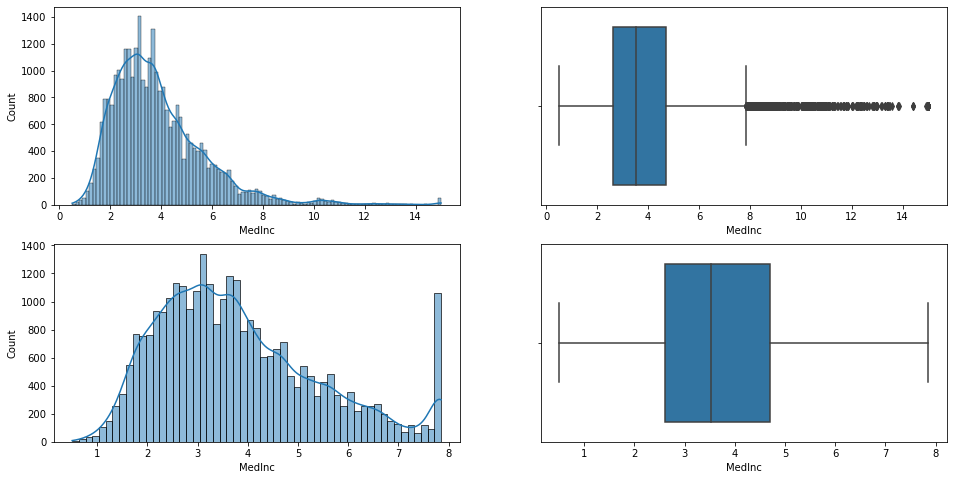

Skewness: 0.412138
Kurtosis: -0.495391


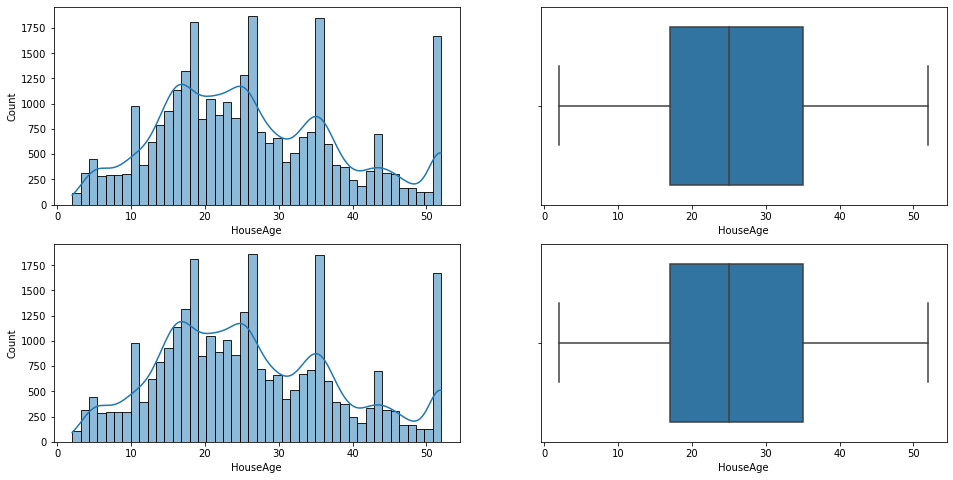

Skewness: 0.281409
Kurtosis: -0.065301


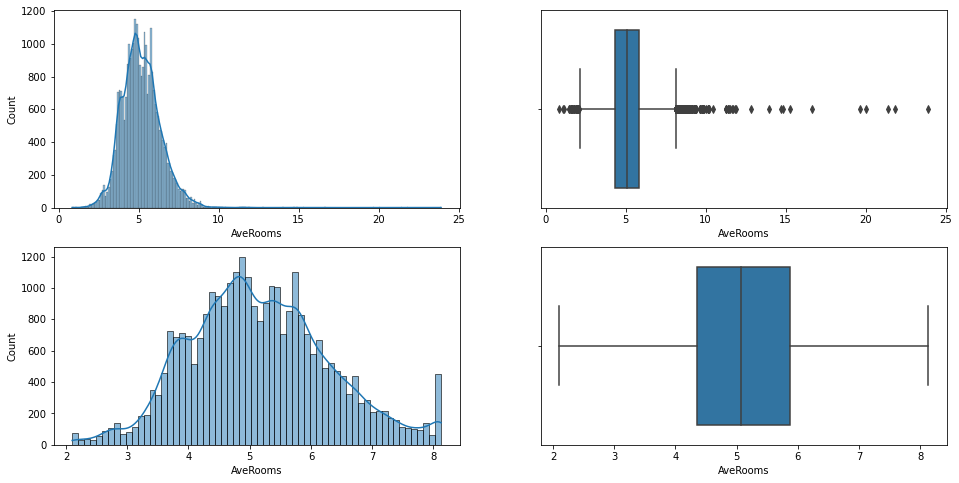

Skewness: 0.264167
Kurtosis: 0.152558


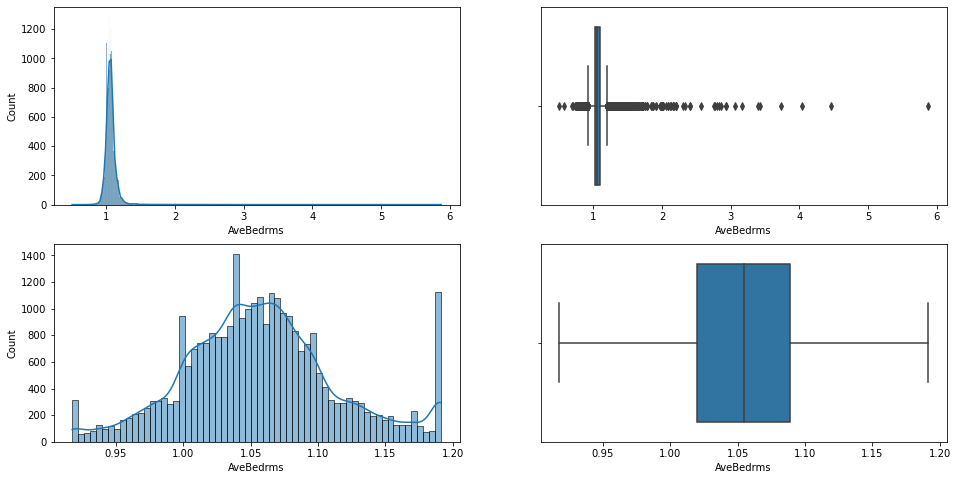

Skewness: 0.795352
Kurtosis: -0.143779


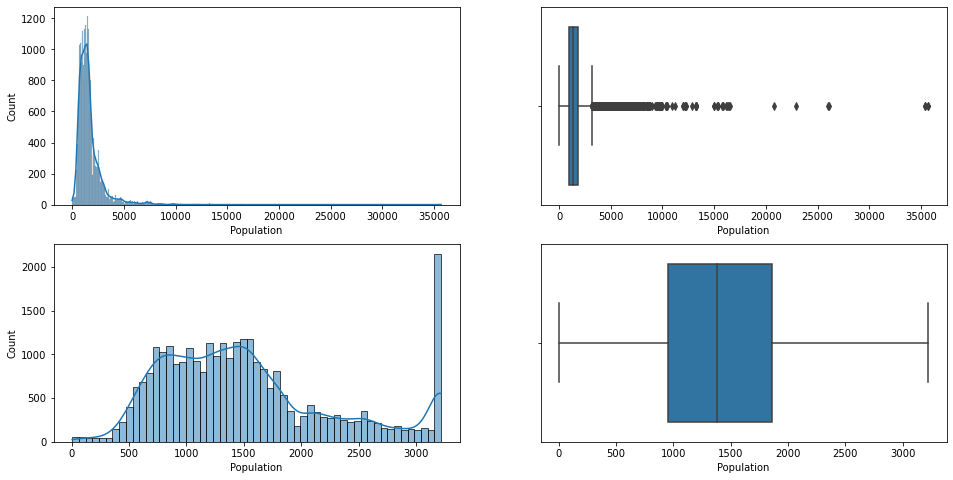

Skewness: 0.395077
Kurtosis: -0.032457


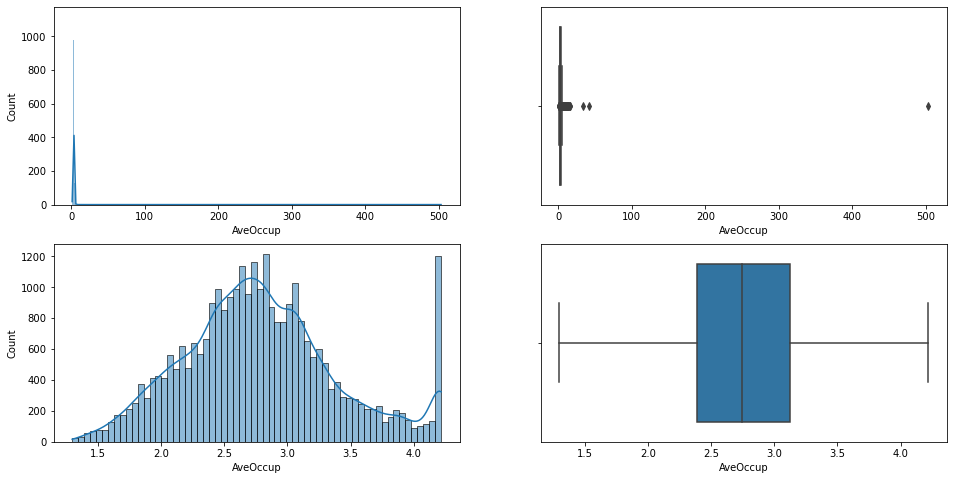

Skewness: 0.431109
Kurtosis: -1.277929


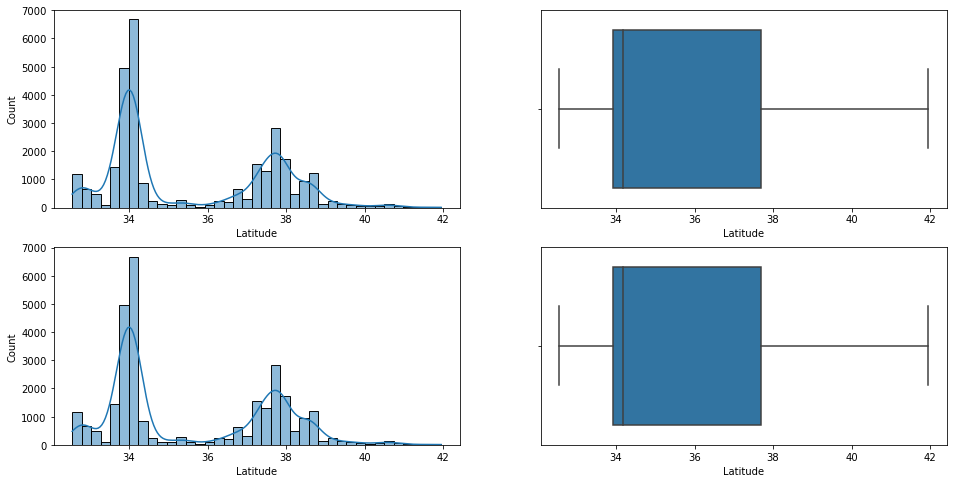

Skewness: -0.305461
Kurtosis: -1.462461


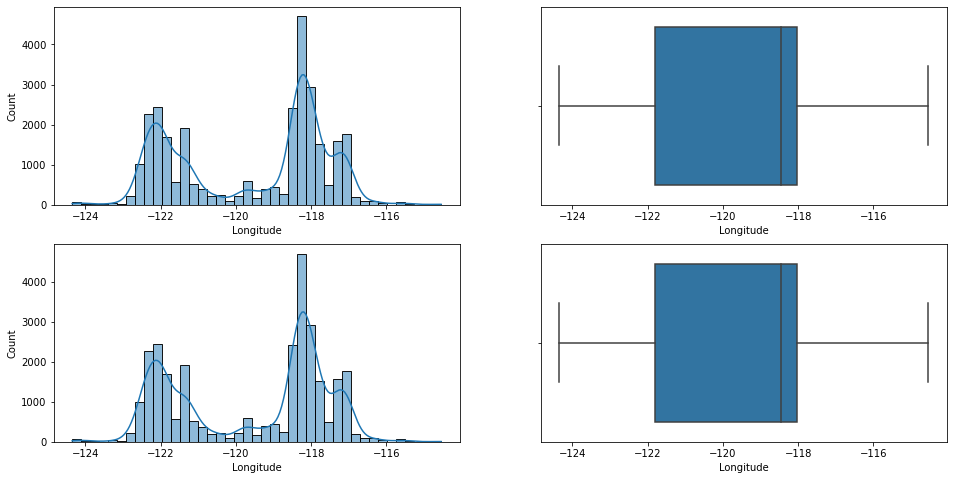

Skewness: 0.913741
Kurtosis: 0.139612


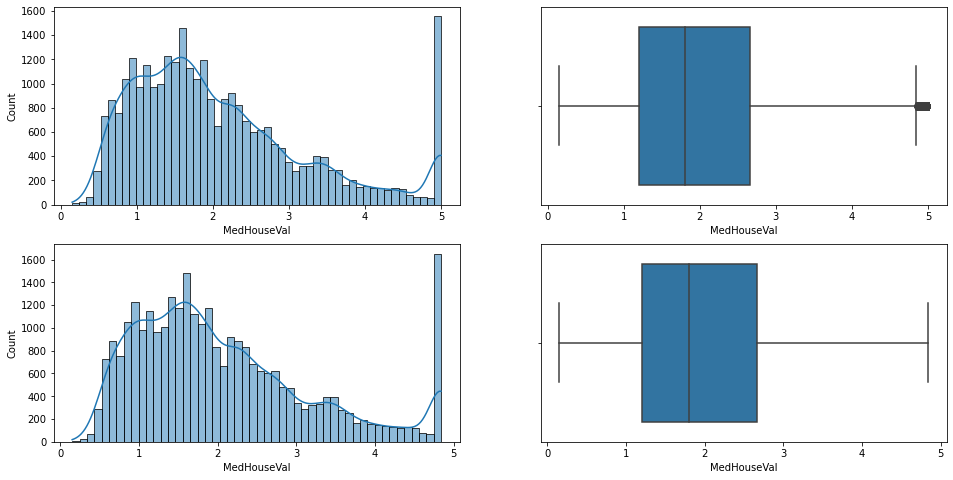

In [18]:
for col in columns_name:
    percentile25 = data[col].quantile(0.25)
    percentile75 = data[col].quantile(0.75)
    IQR = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * IQR
    lower_limit = percentile25 - 1.5 * IQR
    data[data[col] > upper_limit]
    data[data[col] < lower_limit]
    
    new_data = data[data[col] < upper_limit]
    new_data_cap = data.copy()
    new_data_cap[col] = np.where(
        new_data_cap[col] > upper_limit,
        upper_limit,
        np.where(
        new_data_cap[col] < lower_limit,
            lower_limit,
            new_data_cap[col]
        )
    )
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.histplot(data[col],kde=True)
    plt.subplot(2,2,2)
    sns.boxplot(data[col])
    plt.subplot(2,2,3)
    sns.histplot(new_data_cap[col],kde=True)
    plt.subplot(2,2,4)
    sns.boxplot(new_data_cap[col])
    print("Skewness: %f" % new_data_cap[col].skew())
    print("Kurtosis: %f" % new_data_cap[col].kurt())
    plt.show()

In [19]:
#"""""""""
#trimming
#new_df = data[data['MedInc'] < upper_limit]
#data[data['MedInc'] > upper_limit].count()
#new_df.shape
#data.shape
#new_df['MedInc'].head()
#fig, axs = plt.subplots(1,2,figsize=(15,6))

#plt.subplot(2,2,1)
#sns.histplot(new_df['MedInc'],kde=True,ax=axs[0])

#plt.subplot(2,2,1)
#sns.boxplot(data=new_df['MedInc'],ax=axs[1])

#plt.show()

#new_df['MedInc'].skew()
#new_df['MedInc'].kurt()

#data['MedInc'].skew()
#data['MedInc'].kurt()

#""""""""

In [20]:
#"""""""""""
#def col (columns_name):
    #percentile25 = data[col].quantile(0.25)
    #percentile25
    #percentile75 = data[col].quantile(0.75)
    #percentile75
    #IQR = percentile75 - percentile25
    #IQR
    #upper_limit = percentile75 + 1.5 * IQR
    #upper_limit 
    #lower_limit = percentile25 - 1.5 * IQR
    #lower_limit
    #data[data[col] > upper_limit].count()
    #data[data[col] < lower_limit]
    #data[col].skew()
    #new_data_cap = data.copy()
    #new_data_cap[col] = np.where(new_data_cap[col] > upper_limit,upper_limit,
                                #np.where(new_data_cap[col] < lower_limit,lower_limit,
                                #new_data_cap[col] )  )
#"""""""""   

In [21]:
new_data_cap['MedInc'] = np.log(data['MedInc'])
new_data_cap['AveRooms'] = np.log(data['AveRooms'])
new_data_cap['Population'] = np.log(data['Population'])
new_data_cap['AveOccup'] = np.log(data['AveOccup'])

In [22]:
new_data_cap.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,29709.000000,29709.000000,29709.000000,29709.000000,29709.000000,29709.000000,29709.000000,29709.000000,29709.000000
mean,1.250429,26.084856,1.615285,1.062142,7.227045,1.007185,35.574937,-119.559416,2.069501
std,0.444546,12.162222,0.233501,0.096120,0.610912,0.236078,2.083048,1.975349,1.136687
min,-0.693347,2.000000,-0.161268,0.500000,1.098612,-0.051293,32.550000,-124.350000,0.149990
25%,0.955511,17.000000,1.472426,1.020216,6.856462,0.872460,33.930000,-121.800000,1.206000
50%,1.257864,25.000000,1.623396,1.054475,7.232010,1.009572,34.190000,-118.450000,1.807000
75%,1.547563,35.000000,1.769117,1.088657,7.527256,1.138518,37.700000,-118.020000,2.660000
max,2.708057,52.000000,3.173526,5.873181,10.482402,6.220572,41.950000,-114.550000,4.841000


#bivarient analysis

In [23]:
features_column = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup','Latitude', 'Longitude']
target_column = ['MedHouseVal']

(0.6798768506758648, 0.0)
(0.10540301082261333, 3.743686931437391e-74)
(0.3379133208423463, 0.0)
(-0.07147269762984523, 5.905049866829884e-35)
(-0.07652346042748072, 7.823798999952218e-40)
(-0.22306369279098864, 0.0)
(-0.11612165525706179, 1.0561209512053765e-89)
(-0.05892407583333235, 2.848968846320412e-24)


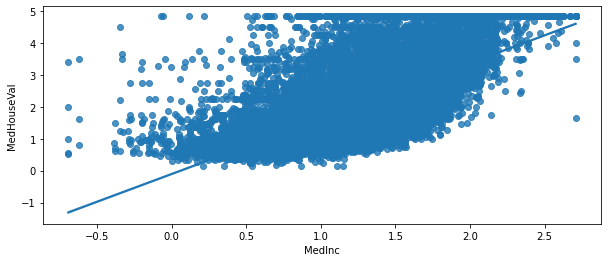

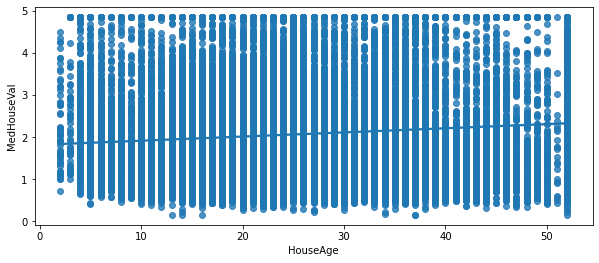

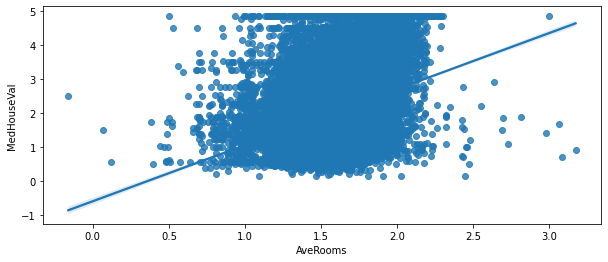

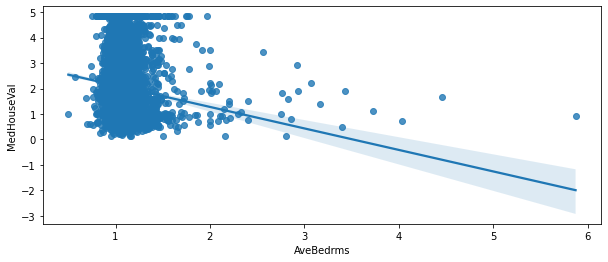

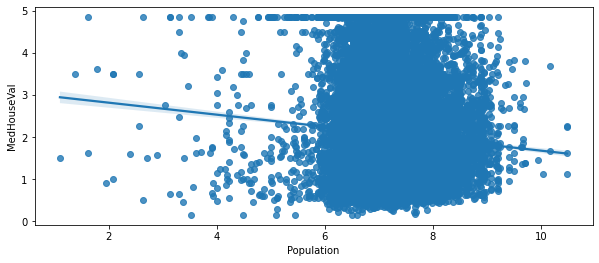

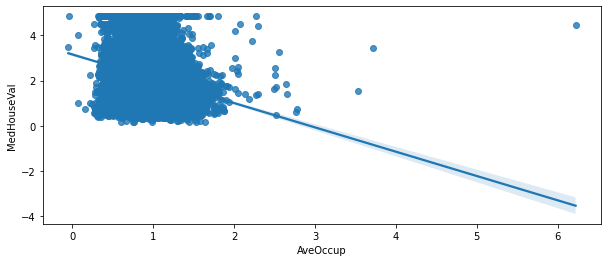

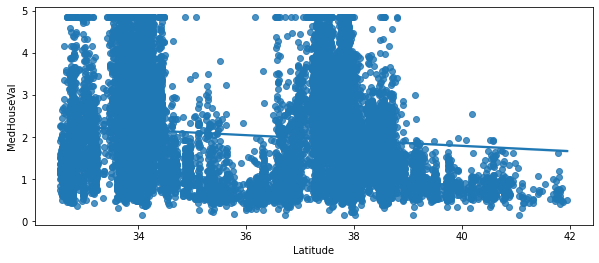

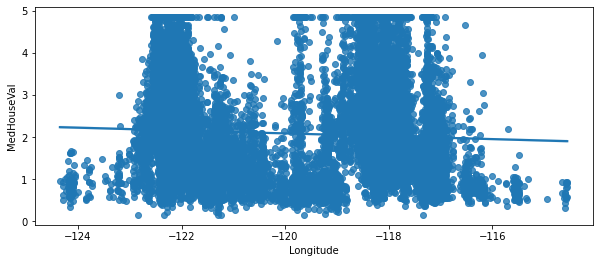

In [24]:
for col in features_column:
    fig, axs = plt.subplots(figsize=(10,4))
    sns.regplot(new_data_cap[col],new_data_cap['MedHouseVal'])
    print(stats.pearsonr(new_data_cap[col],new_data_cap['MedHouseVal']))

<AxesSubplot:>

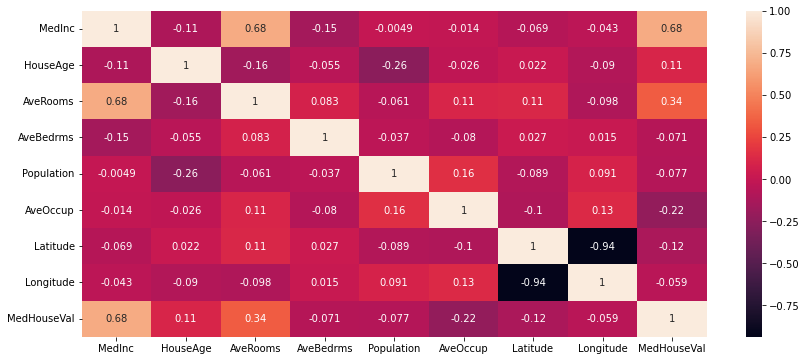

In [25]:
plt.figure(figsize=(14,6))
sns.heatmap(new_data_cap.corr(),annot=True)

In [26]:
#new_drop_column =['Latitude', 'Longitude'] 
#data.drop(new_drop_column,axis=1,inplace=True)
#data.head(5)

In [27]:
data.columns     #new_data.columns 

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [28]:
target =['MedHouseVal']
features =['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population','AveOccup','Latitude', 'Longitude']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
train_x,test_x,train_y,test_y = train_test_split(data[features],data[target],test_size=0.2 , random_state=121)

In [31]:
train_x.shape,test_x.shape

((23767, 8), (5942, 8))

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
model_random_forest = RandomForestRegressor(n_estimators=100, random_state=121)

In [34]:
model=model_random_forest.fit(train_x,train_y)

In [35]:
test_pred = model.predict(test_x)

In [36]:
test_pred

array([1.53013  , 1.51232  , 3.8267415, ..., 1.73589  , 4.1189926,
       0.62351  ])

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
mean_squared_error(test_y, test_pred)

0.35798429666964565

In [39]:
train_pred = model.predict(train_x)
train_pred

array([2.43248, 1.02911, 1.40128, ..., 3.01318, 2.54755, 2.70538])

In [40]:
mean_squared_error(train_y, train_pred)

0.049592451122262564

In [41]:
#from sklearn.model_selection import RandomizedSearchCV

In [42]:
#params = {'n_estimators':[100], 'max_depth':[7],'min_samples_leaf':[20]}

In [43]:
#random_model = RandomizedSearchCV(estimator=model, param_distributions=params,  n_iter=10, scoring='f1', n_jobs=-1, refit=True, cv=5, random_state=121, return_train_score=True)

In [44]:
#random_search=random_model.fit(train_x,train_y)

In [45]:
#test_pred_random_search = random_search.predict(test_x)

In [46]:
#test_pred_random_search

In [47]:
#mean_squared_error(test_y, test_pred_random_search)

In [48]:
#x=model.predict(data[features])

In [49]:
#mean_squared_error(data[target], x)

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
param_grid={'n_estimators': [100],
            'max_depth':  [22, 23, 24, 25],
            'max_features': [5,6,7,8]}

gs=GridSearchCV(model_random_forest, param_grid, scoring=None,n_jobs=-1, cv=5, verbose=1)

In [52]:
gride_search=gs.fit(train_x,train_y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [53]:
test_pred_gs = gride_search.predict(test_x)

In [54]:
test_pred_gs

array([1.55762   , 1.57564986, 3.63293791, ..., 1.7586    , 4.05825123,
       0.65982144])

In [55]:
mean_squared_error(test_y, test_pred_gs)

0.3486968409559354

In [56]:
train_pred_gs=gride_search.predict(train_x)

In [57]:
mean_squared_error(train_y, train_pred_gs)

0.04890714286199016

In [58]:
feature_predict=gride_search.predict(data[features])

In [59]:
mean_squared_error(data[target], feature_predict)

0.10886710065505698

In [60]:
#train_predictions=pd.DataFrame({'actual':data[target],'predictions':gride_search.predict(data[features])})

In [61]:
df=pd.read_csv('housing_testing_data.csv')

In [62]:
df.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,16148,2.2235,12.0,3.967700,1.177003,1457.0,3.633075,34.09,-117.30
1,7213,4.0484,26.0,6.776596,1.038298,1816.0,3.836257,34.28,-118.74
2,23067,2.3571,20.0,3.621701,1.074380,2919.0,1.554825,37.36,-121.89
3,28335,1.7552,30.0,2.342071,1.093834,1327.0,3.065442,34.05,-118.29
4,33439,2.5754,52.0,3.136150,1.166667,870.0,1.890476,37.78,-122.42


In [63]:
df.dtypes

id              int64
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

In [64]:
df['Population'] = df['Population'].astype(int)
df.dtypes

id              int64
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population      int32
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

In [65]:
df_features =['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population','AveOccup','Latitude', 'Longitude']

In [66]:
test_predict_df=gride_search.predict(df[df_features])

In [67]:
test_predict_df

array([0.94522636, 2.0737903 , 2.2528001 , ..., 3.370391  , 4.788428  ,
       1.88593022])

In [68]:
test_prediction_on_test_data=pd.DataFrame({'id':df['id'],'test_data_predicted':test_predict_df})

In [69]:
test_prediction_on_test_data.head()

,id,test_data_predicted
0,16148,0.945226
1,7213,2.073790
2,23067,2.252800
3,28335,1.871578
4,33439,2.284409


In [70]:
test_prediction_on_test_data.to_csv('sample_file1.csv',index=False)

In [ ]:
# use here lgbm and randomsearch 3rd type